# Regression Task


## Libraries Imports


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import warnings

from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
)
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [2]:
warnings.simplefilter(action="ignore", category=FutureWarning)

## Load the dataset and EDA


In [3]:
df_dev = pd.read_csv("./Data/development.csv")
df_eval = pd.read_csv("./Data/evaluation.csv")

In [4]:
df_dev.head()

,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,200.0,200.0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,4.538778,...,607.109118,-36.282996,583.899899,72.373094,0.374498,614.916861,-39.848523,591.852768,72.331028,0.405595
1,200.0,200.0,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,3.720435,...,630.348007,-39.715988,580.042799,71.029155,0.403258,624.950701,-41.266681,586.569646,71.089058,0.405890
2,200.0,200.0,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,3.490490,...,613.880342,-40.679678,580.407491,71.892264,0.568777,596.437125,-42.712286,574.091695,71.943934,0.498019
3,200.0,200.0,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,6.786200,...,600.714957,-43.206601,579.882635,72.357388,0.255483,591.763739,-50.681940,584.099483,72.333282,0.336454
4,200.0,200.0,4.448146,-4.848743,3.997002,196.667482,1.101113,3.250262,-5.783587,2.449456,...,609.723785,-43.570892,590.156125,71.249130,0.413855,606.917023,-49.923819,584.316142,71.242904,0.293824


In [5]:
df_dev.describe().T

,count,mean,std,min,25%,50%,75%,max
x,385500.0,397.723735,120.593104,200.000000,285.000000,400.000000,500.000000,600.000000
y,385500.0,404.106355,113.652228,200.000000,310.000000,405.000000,500.000000,600.000000
pmax[0],385500.0,4.866423,1.481220,1.394440,4.123941,4.668321,5.265888,20.515415
negpmax[0],385500.0,-5.046162,15.877804,-7741.109923,-5.257178,-4.646420,-4.093211,-0.745816
area[0],385500.0,4.330495,3.489414,-0.582573,2.383830,3.361071,5.104368,149.589043
...,...,...,...,...,...,...,...,...
pmax[17],385500.0,609.060121,13.928735,456.816620,599.390156,607.202368,617.313303,675.052221
negpmax[17],385500.0,-46.921923,3.478838,-57.876959,-49.596344,-47.147636,-44.375652,-29.592059
area[17],385500.0,583.060292,6.992203,513.760083,578.269642,583.401620,587.877953,619.099952
tmax[17],385500.0,71.695363,0.585629,70.423425,71.200245,71.681603,72.194196,73.031394


In [6]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385500 entries, 0 to 385499
Data columns (total 92 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   x            385500 non-null  float64
 1   y            385500 non-null  float64
 2   pmax[0]      385500 non-null  float64
 3   negpmax[0]   385500 non-null  float64
 4   area[0]      385500 non-null  float64
 5   tmax[0]      385500 non-null  float64
 6   rms[0]       385500 non-null  float64
 7   pmax[1]      385500 non-null  float64
 8   negpmax[1]   385500 non-null  float64
 9   area[1]      385500 non-null  float64
 10  tmax[1]      385500 non-null  float64
 11  rms[1]       385500 non-null  float64
 12  pmax[2]      385500 non-null  float64
 13  negpmax[2]   385500 non-null  float64
 14  area[2]      385500 non-null  float64
 15  tmax[2]      385500 non-null  float64
 16  rms[2]       385500 non-null  float64
 17  pmax[3]      385500 non-null  float64
 18  negpmax[3]   385500 non-

In [7]:
df_dev.isnull().sum()

x              0
y              0
pmax[0]        0
negpmax[0]     0
area[0]        0
              ..
pmax[17]       0
negpmax[17]    0
area[17]       0
tmax[17]       0
rms[17]        0
Length: 92, dtype: int64

### Univariate Analisys


In [8]:
plt.figure(figsize=(13, 17))
sns.pairplot(data=df_dev.sample(frac=0.1).drop(["x", "y"], axis=1))
plt.show()

### Multivariate Analysis


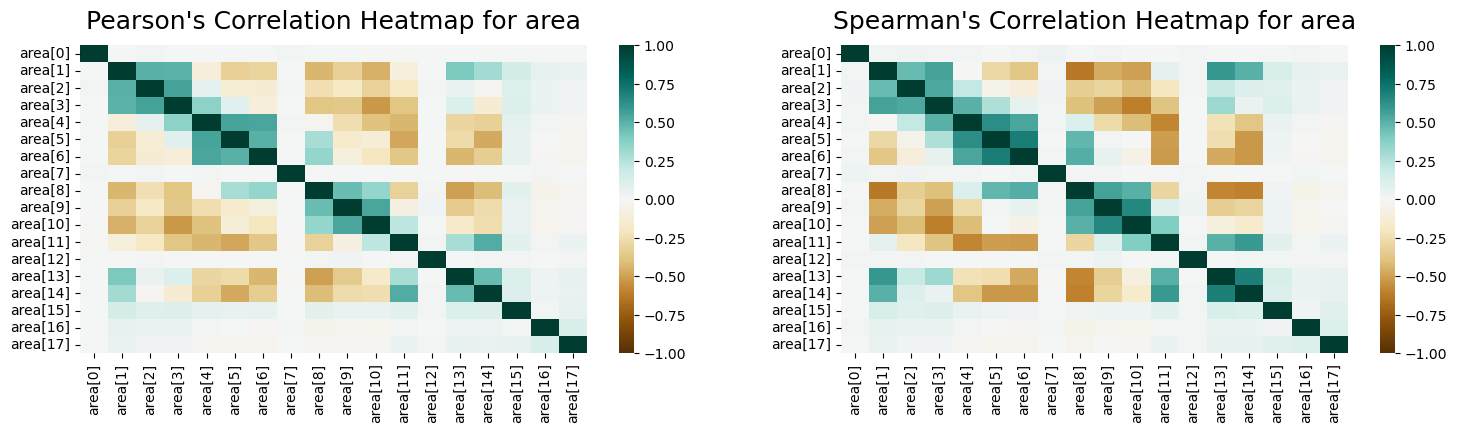

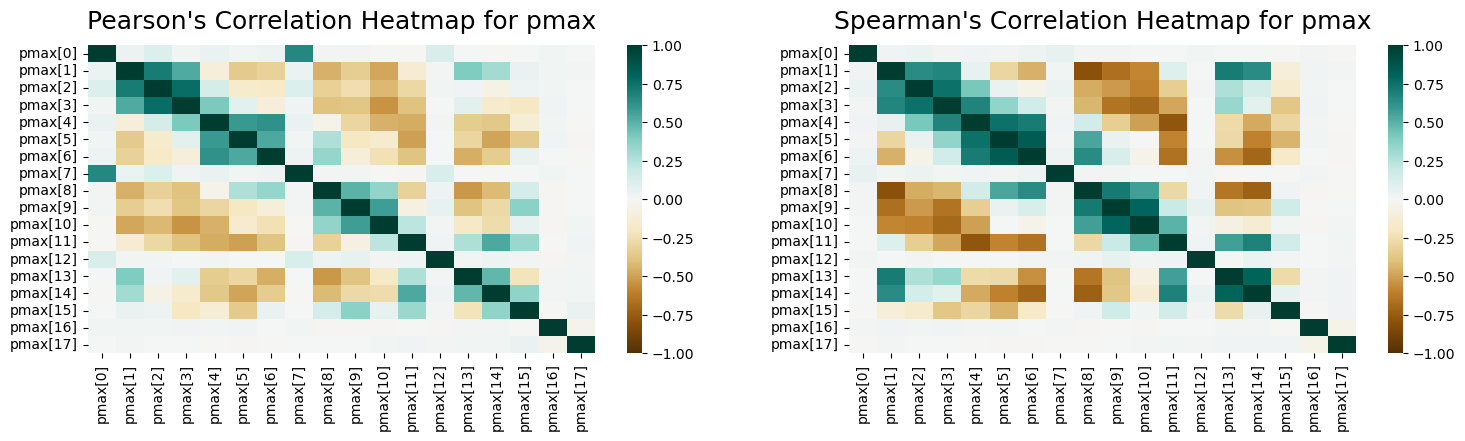

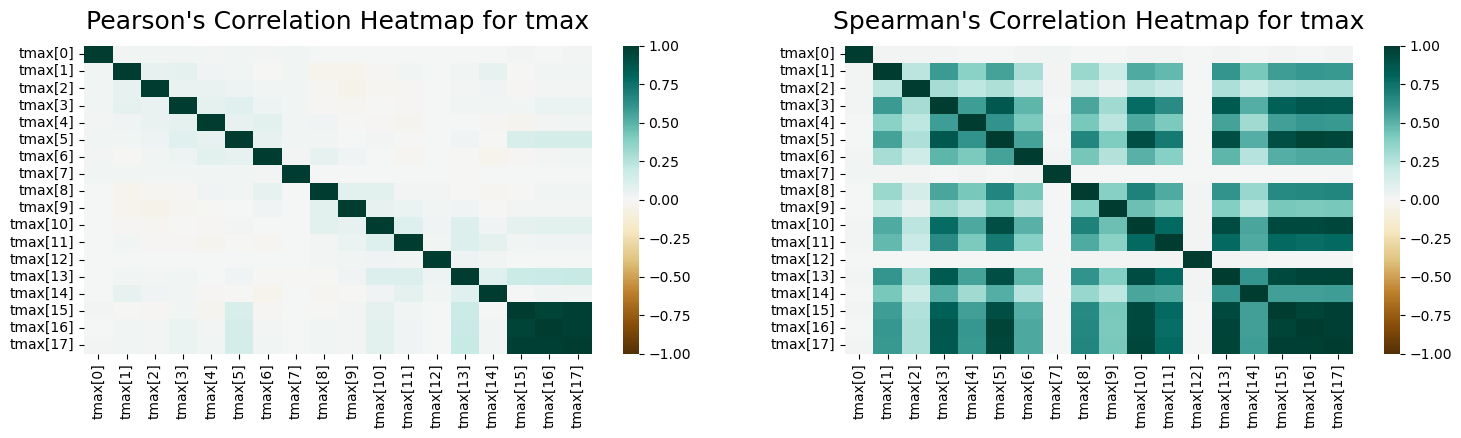

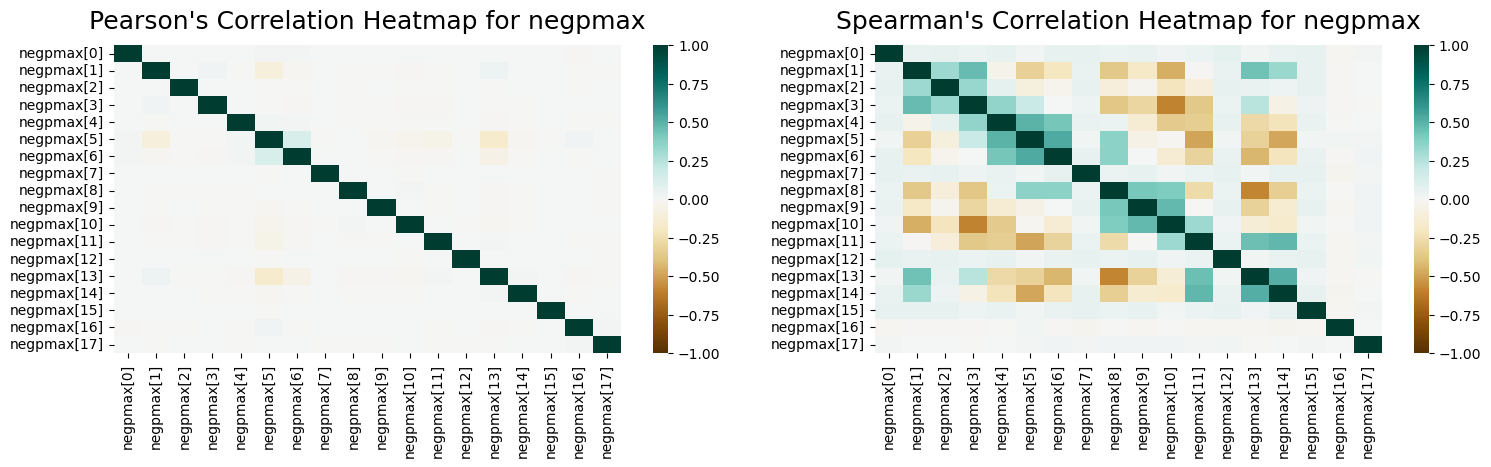

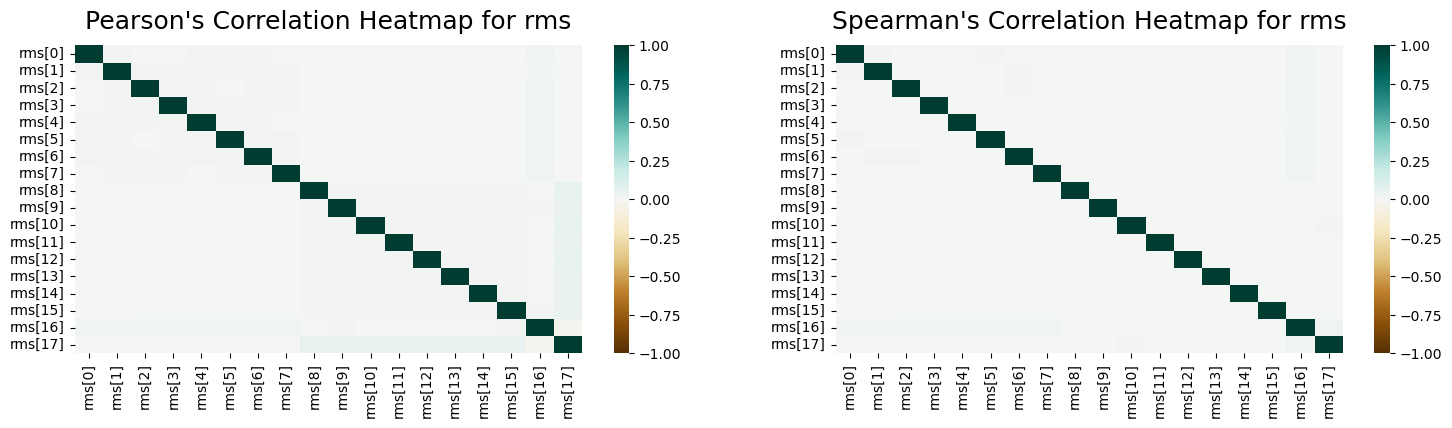

In [8]:
features = ["area", "pmax", "tmax", "negpmax", "rms"]
for feature in features:
    columns = [col for col in df_dev if col.startswith(feature)]
    df_feature = df_dev[columns]
    plt.figure(figsize=(18, 4))
    plt.subplot(1, 2, 1)
    heatmap = sns.heatmap(
        df_feature.corr(method="pearson"), vmin=-1, vmax=1, cmap="BrBG"
    )
    heatmap.set_title(
        f"Pearson's Correlation Heatmap for {feature}",
        fontdict={"fontsize": 18},
        pad=12,
    )
    plt.subplot(1, 2, 2)
    heatmap = sns.heatmap(
        df_feature.corr(method="spearman"), vmin=-1, vmax=1, cmap="BrBG"
    )
    heatmap.set_title(
        f"Spearman's Correlation Heatmap for {feature}",
        fontdict={"fontsize": 18},
        pad=12,
    )
    plt.show()

### Scatter Plot of the Development Set


In [ ]:
values = np.vstack([df_dev["x"], df_dev["y"]])
kernel = stats.gaussian_kde(values)(values)
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(
    data=df_dev,
    x="x",
    y="y",
    c=kernel,
    cmap="viridis",
    ax=ax,
)
sns.set_style(style="whitegrid")

### Drop Noise Pads Function


In [9]:
def drop_noise(data):
    noise_sensors = ["0", "7", "12", "15", "16", "17"]

    for sensor in noise_sensors:
        data = data.drop(
            columns=[
                f"area[{sensor}]",
                f"tmax[{sensor}]",
                f"pmax[{sensor}]",
                f"negpmax[{sensor}]",
                f"rms[{sensor}]",
            ]
        )
    return data

In [10]:
df_dev = drop_noise(df_dev)

### Outliers Detection and Removal


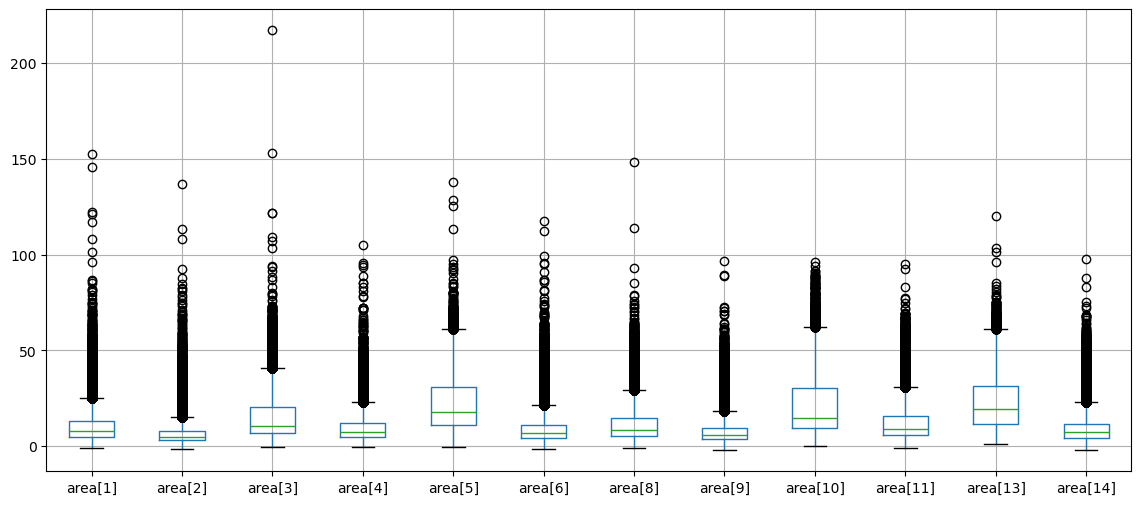

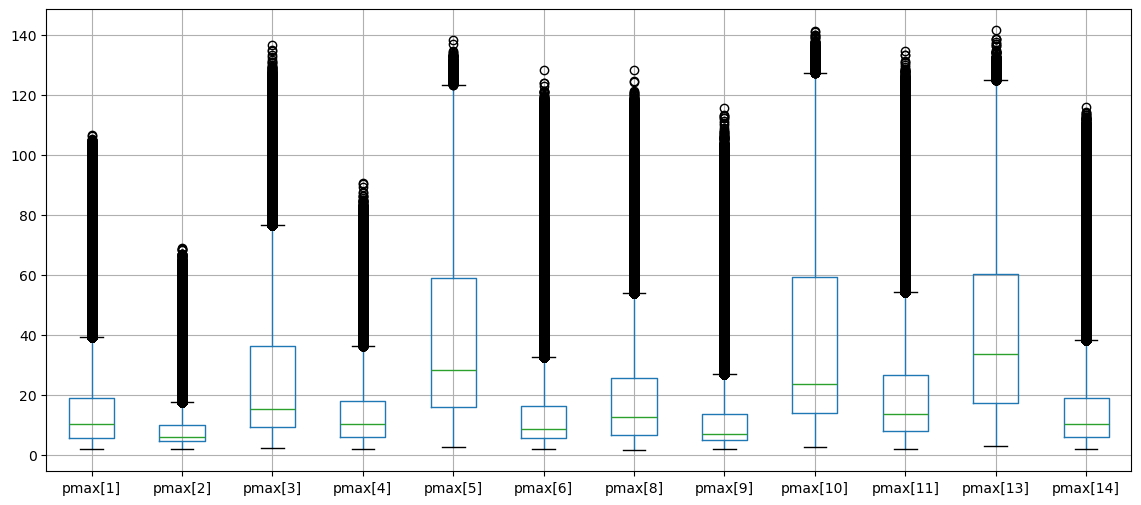

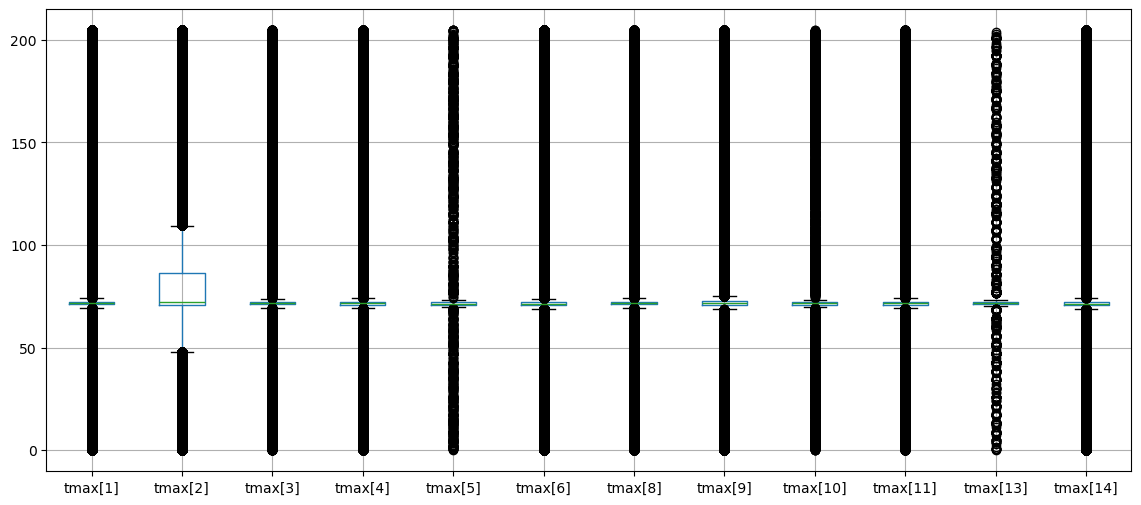

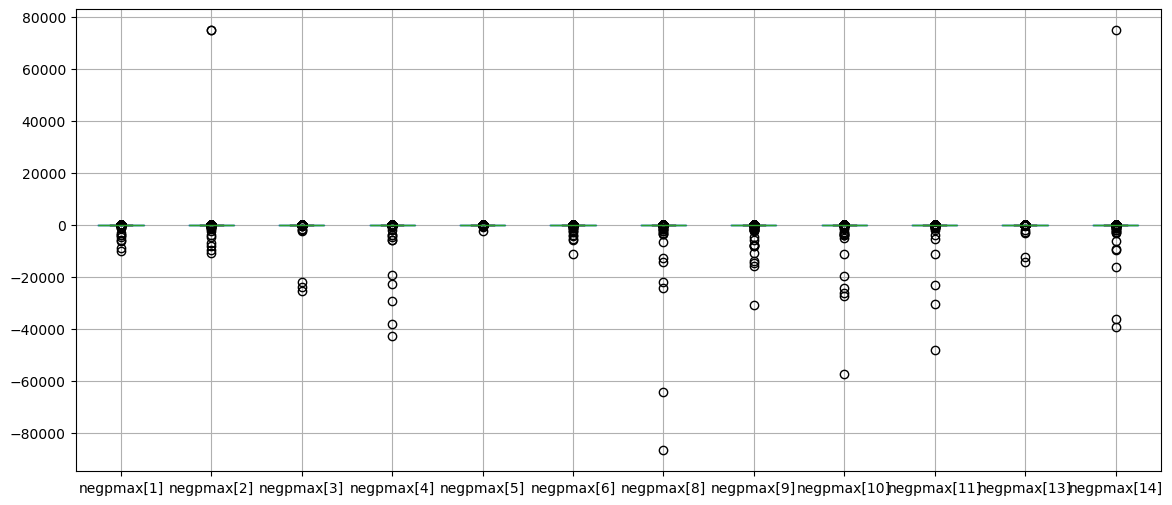

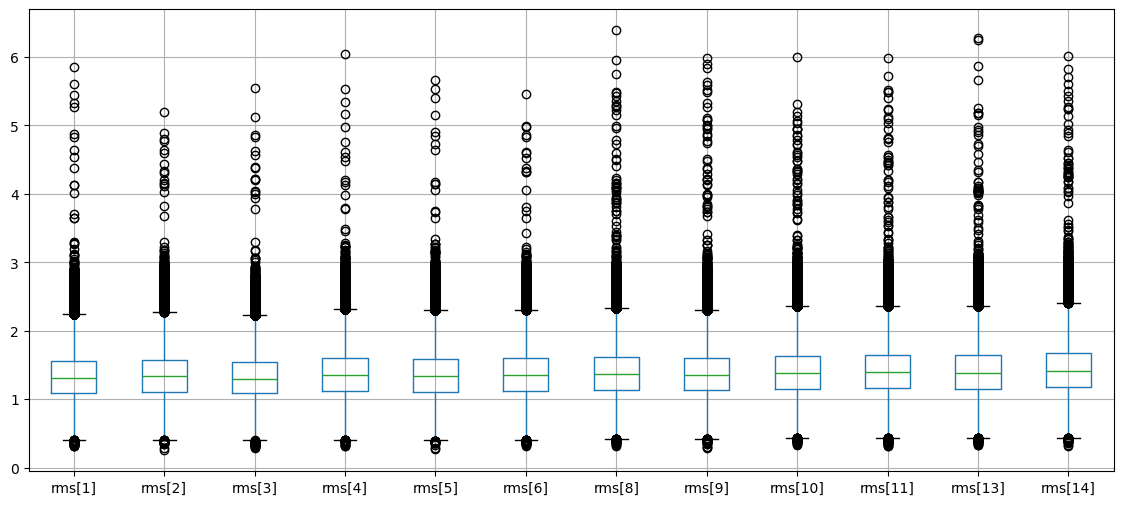

In [11]:
features = ["area", "pmax", "tmax", "negpmax", "rms"]
for feature in features:
    columns = [col for col in df_dev if col.startswith(feature)]
    df_feature = df_dev[columns]
    df_feature.boxplot(figsize=(14, 6))
    plt.show()

In [12]:
def drop_outside_quantiles(df, lower_percentile=0.01, upper_percentile=0.99):
    numeric_cols = df.select_dtypes(include=["number"]).columns

    for col in numeric_cols:
        lower_quantile = df[col].quantile(lower_percentile)
        upper_quantile = df[col].quantile(upper_percentile)

        df = df[(df[col] >= lower_quantile) & (df[col] <= upper_quantile)]

    return df

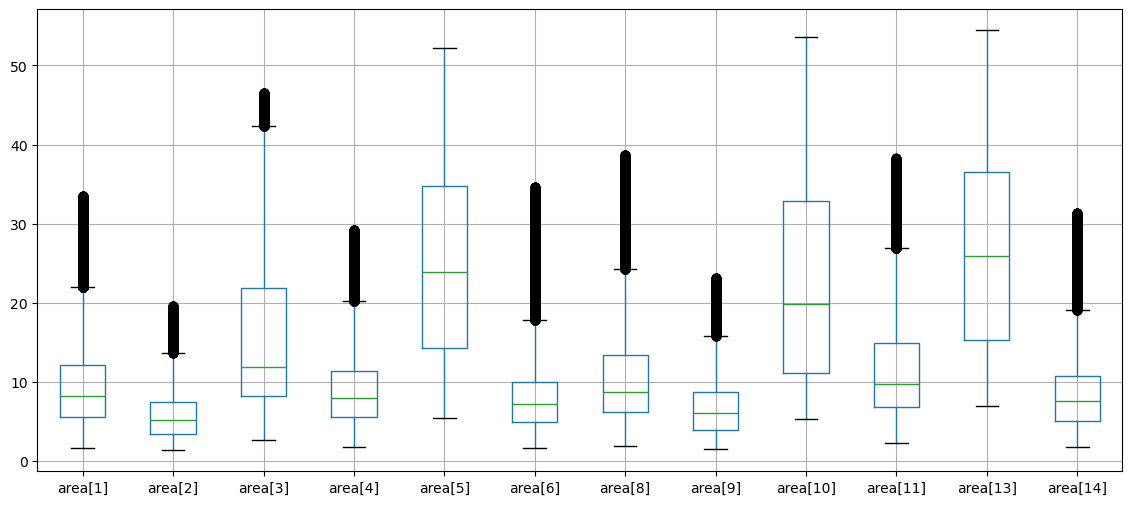

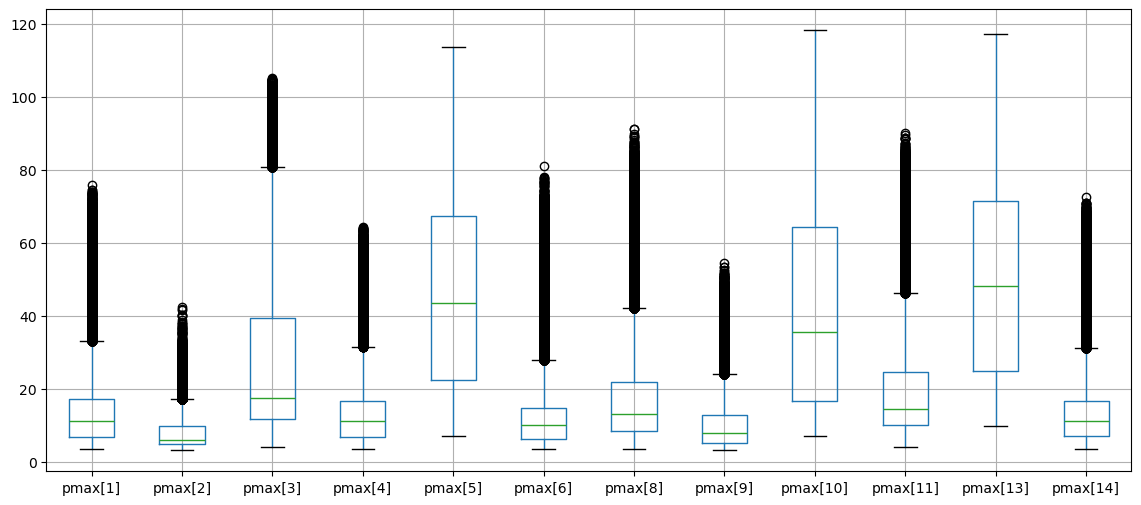

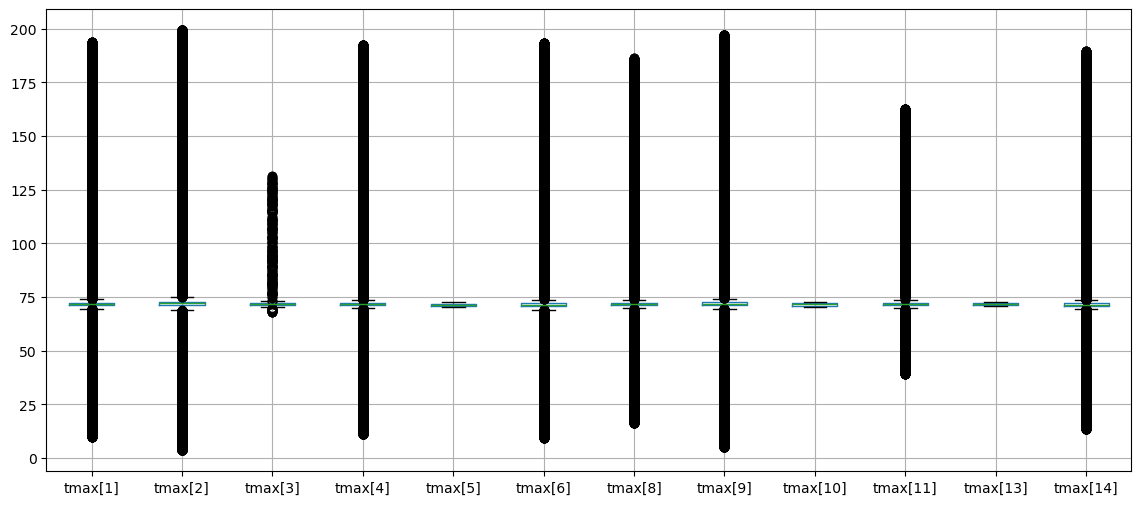

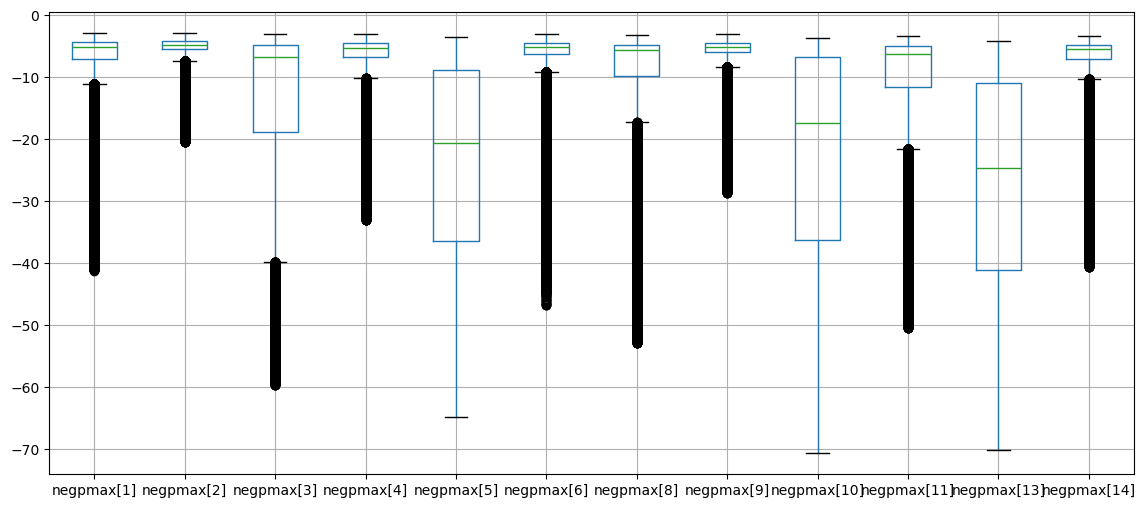

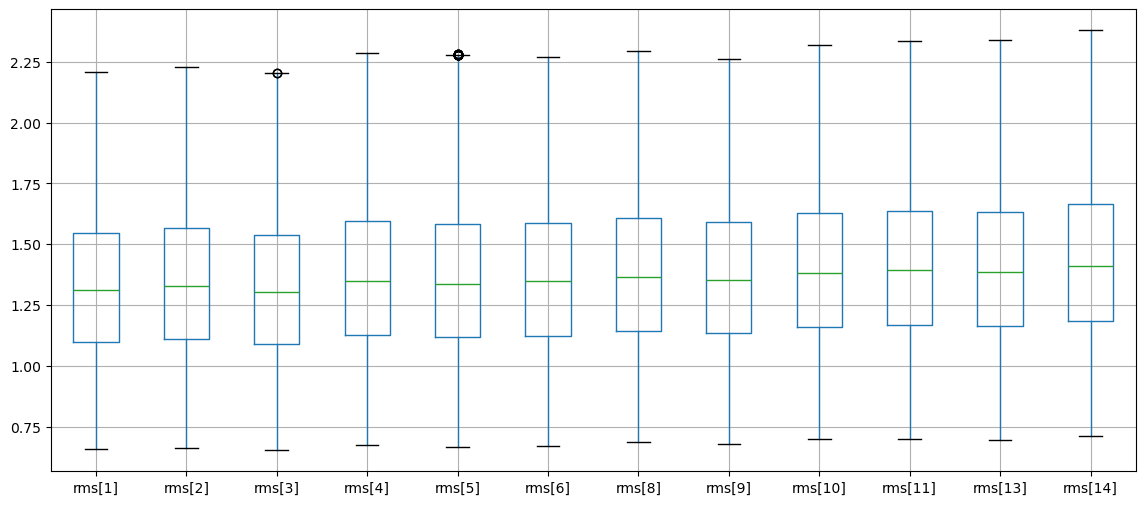

In [13]:
df_dev_clean = drop_outside_quantiles(df_dev)

features = ["area", "pmax", "tmax", "negpmax", "rms"]
for feature in features:
    columns = [col for col in df_dev_clean if col.startswith(feature)]
    df_feature = df_dev_clean[columns]
    df_feature.boxplot(figsize=(14, 6))
    plt.show()

#### Test for Outliers Removal Effectivness


In [15]:
def average_euclidean_distance_between_arrays(array1, array2):
    distances = np.linalg.norm(array1 - array2, axis=1)
    average_distances = np.mean(distances)

    return average_distances

In [ ]:
X = df_dev.drop(columns=["x", "y"])
y = df_dev[["x", "y"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)

rf = MultiOutputRegressor(RandomForestRegressor(n_jobs=-1, verbose=1)).fit(
    X_train, y_train
)
y_pred = rf.predict(X_test)

score = average_euclidean_distance_between_arrays(y_pred, y_test)
print(f"Avg Euclidean Distance with outliers: {score}")

In [ ]:
X = df_dev_clean.drop(columns=["x", "y"])
y = df_dev_clean[["x", "y"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)

rf = MultiOutputRegressor(RandomForestRegressor(n_jobs=-1, verbose=1)).fit(
    X_train, y_train
)
y_pred = rf.predict(X_test)

score = average_euclidean_distance_between_arrays(y_pred, y_test)
print(f"Avg Euclidean Distance without outliers: {score}")

## Feature Selection Through Baseline Random Forest


In [ ]:
X = df_dev_clean.drop(columns=["x", "y"])
y = df_dev_clean[["x", "y"]]
feature_names = df_dev.drop(columns=["x", "y"]).columns

X_train, X_valid, y_test, y_test = train_test_split(X, y, shuffle=True, random_state=42)

rf = MultiOutputRegressor(RandomForestRegressor(n_jobs=-1, verbose=1)).fit(
    X_train, y_train
)
y_pred = rf.predict(X_test)

average_euclidean_distance_between_arrays(y_pred, y_test)

### Each feature importance


In [ ]:
importances = sorted(
    zip(feature_names, rf.estimators_[0].feature_importances_),
    key=lambda x: x[1],
)
importances

### Importance for each measurment


In [ ]:
sum_by_measure = {}

for name, value in importances:
    measure = name.split("[")[0]
    if measure in sum_by_measure:
        sum_by_measure[measure] += value
    else:
        sum_by_measure[measure] = value

print(sum_by_measure)

### Drop Unimportant Features and Check Improvements


In [ ]:
tmax_columns = [col for col in df_dev if col.startswith("tmax")]
rms_columns = [col for col in df_dev if col.startswith("rms")]
tmax_rms = tmax_columns + rms_columns
df_dev = df_dev.drop(columns=tmax_rms, axis=1)

In [ ]:
X = df_dev.drop(columns=["x", "y"])
y = df_dev[["x", "y"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)

rf = MultiOutputRegressor(RandomForestRegressor(n_jobs=-1, verbose=1)).fit(
    X_train, y_train
)
y_pred = rf.predict(X_test)

score = average_euclidean_distance_between_arrays(y_pred, y_test)
print(f"Avg Euclidean Distance without Unimportant Features (rms and tmax): {score}")

## Checking possible improvments with different Scalers


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

rf = MultiOutputRegressor(RandomForestRegressor(n_jobs=-1, verbose=1)).fit(
    X_train, y_train
)
y_pred = rf.predict(X_test)
print(f"Avg Euclidean Distance with Standard Scaler: {score}")

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

rf = MultiOutputRegressor(RandomForestRegressor(n_jobs=-1, verbose=1)).fit(
    X_train, y_train
)
y_pred = rf.predict(X_test)
print(f"Avg Euclidean Distance with Standard Scaler: {score}")

In [ ]:
scaler = RobustScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

rf = MultiOutputRegressor(RandomForestRegressor(n_jobs=-1, verbose=1)).fit(
    X_train, y_train
)
y_pred = rf.predict(X_test)
print(f"Avg Euclidean Distance with Standard Scaler: {score}")

## Final PreProcessing Pipeline


In [16]:
def preprocessing(df):
    # Noise Pads
    df = drop_noise(df)

    # Unimportant Features
    tmax_columns = [col for col in df if col.startswith("tmax")]
    rms_columns = [col for col in df if col.startswith("rms")]
    tmax_rms = tmax_columns + rms_columns
    df = df.drop(columns=tmax_rms, axis=1)

    return df

In [17]:
df = pd.concat([df_dev, df_eval], sort=False)
len(df_dev), len(df_eval), len(df)

(385500, 128500, 514000)

In [18]:
df = preprocessing(df)

## Model Evaluation


In [ ]:
train_valid_mask = df["Id"].isna()
test_mask = df["Id"].notna()
feature_names = df[train_valid_mask].drop(columns=["Id", "x", "y"]).columns
X = df.drop(columns=["Id", "x", "y"])
y = df[["x", "y"]]

X_train_valid = X[train_valid_mask].values
y_train_valid = y[train_valid_mask].values
X_test = X[test_mask].values
y_test = y[test_mask].values


X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_valid, y_train_valid, shuffle=True, random_state=42
)

In [ ]:
pipelines = []

pipelines.append(
    ("RF", Pipeline([("RF", MultiOutputRegressor(RandomForestRegressor(n_jobs=-1)))]))
)
pipelines.append(
    ("GB", Pipeline([("GB", MultiOutputRegressor(GradientBoostingRegressor()))]))
)

In [ ]:
results = []
names = []

for name, model in pipelines:
    print(name)
    kf = KFold(n_splits=3, shuffle=True, random_state=42)

    euclidean_distances_list = []

    for train_index, val_index in kf.split(X_train_valid):
        X_train, X_val = X_train_valid[train_index], X_train_valid[val_index]
        y_train, y_val = y_train_valid[train_index], y_train_valid[val_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        avg_distance = average_euclidean_distance_between_arrays(y_val, y_pred)
        euclidean_distances_list.append(avg_distance)

        mean_distance = np.mean(euclidean_distances_list)
        std_distance = np.std(euclidean_distances_list)

    print(f"Mean Euclidean Distance: {mean_distance}")
    print(f"Standard Deviation of Euclidean Distance: {std_distance}")
    print("------------")

## Hyperparameter Tuning


### Stratified Sampling


In [19]:
def sample_percentage(group):
    return group.sample(frac=0.2, random_state=42)

In [20]:
bins_x = np.arange(200, 600 + 100, 50)
bins_y = np.arange(200, 600 + 100, 50)


df_dev["x_interval"] = pd.cut(df_dev["x"], bins=bins_x, right=False)
df_dev["y_interval"] = pd.cut(df_dev["y"], bins=bins_y, right=False)

result = df_dev.groupby(["x_interval", "y_interval"]).size().reset_index(name="count")
result

,x_interval,y_interval,count
0,"[200, 250)","[200, 250)",6400
1,"[200, 250)","[250, 300)",8000
2,"[200, 250)","[300, 350)",7200
3,"[200, 250)","[350, 400)",7400
4,"[200, 250)","[400, 450)",6800
...,...,...,...
76,"[600, 650)","[400, 450)",600
77,"[600, 650)","[450, 500)",700
78,"[600, 650)","[500, 550)",600
79,"[600, 650)","[550, 600)",800


In [21]:
df_dev_sampled = df_dev.groupby(["x_interval", "y_interval"], group_keys=False).apply(
    sample_percentage
)
df_dev_sampled.groupby(["x_interval", "y_interval"]).size().reset_index(name="count")

,x_interval,y_interval,count
0,"[200, 250)","[200, 250)",1280
1,"[200, 250)","[250, 300)",1600
2,"[200, 250)","[300, 350)",1440
3,"[200, 250)","[350, 400)",1480
4,"[200, 250)","[400, 450)",1360
...,...,...,...
76,"[600, 650)","[400, 450)",120
77,"[600, 650)","[450, 500)",140
78,"[600, 650)","[500, 550)",120
79,"[600, 650)","[550, 600)",160


In [22]:
df_sampled = pd.concat([df_dev_sampled, df_eval], sort=False)
len(df_dev_sampled), len(df_eval), len(df)

(77100, 128500, 514000)

In [23]:
df_sampled = preprocessing(df_sampled)

### Sample Development Scatter Plot


<Axes: xlabel='x', ylabel='y'>

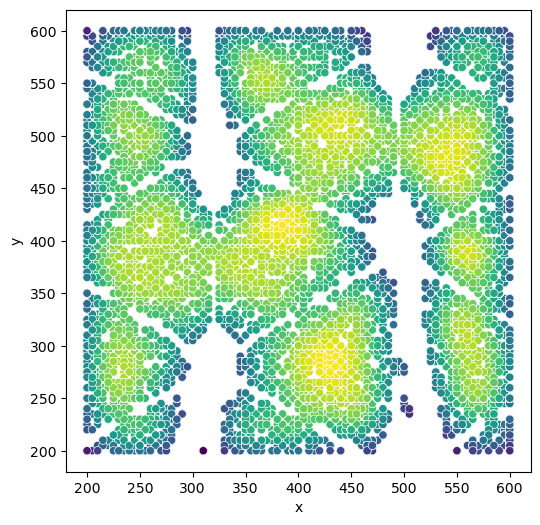

In [24]:
values = np.vstack([df_dev_sampled["x"], df_dev_sampled["y"]])
kernel = stats.gaussian_kde(values)(values)
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(
    data=df_dev_sampled,
    x="x",
    y="y",
    c=kernel,
    cmap="viridis",
    ax=ax,
)

### Total Development Scatter Plot


In [ ]:
values = np.vstack([df_dev["x"], df_dev["y"]])
kernel = stats.gaussian_kde(values)(values)
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(
    data=df_dev,
    x="x",
    y="y",
    c=kernel,
    cmap="viridis",
    ax=ax,
)
sns.set_style(style="whitegrid")

### Optuna Random Search


In [ ]:
import optuna
from sklearn.metrics import make_scorer

custom_scorer = make_scorer(
    average_euclidean_distance_between_arrays, greater_is_better=False
)


def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 400, 1200)
    max_features = trial.suggest_categorical("max_features", ["sqrt"])
    max_depth = trial.suggest_int("max_depth", 1, 100)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 12)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 12)

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    cv_scores = []

    model = MultiOutputRegressor(
        RandomForestRegressor(
            n_estimators=n_estimators,
            max_features=max_features,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            n_jobs=-1,
        )
    )

    for train_index, test_index in kf.split(X_train_valid):
        X_train, X_test = X_train_valid[train_index], X_train_valid[test_index]
        y_train, y_test = y_train_valid[train_index], y_train_valid[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        cv_scores.append(average_euclidean_distance_between_arrays(y_pred, y_test))

    return np.mean(cv_scores)

In [ ]:
study = optuna.create_study(
    direction="minimize", sampler=optuna.samplers.RandomSampler()
)

[I 2024-01-26 01:25:55,464] A new study created in memory with name: no-name-20332d87-0878-444e-b20a-42241c05e32b


In [ ]:
study.optimize(objective, n_trials=200)

In [ ]:
best_params = study.best_params
best_params

{'n_estimators': 968,
 'max_features': 'sqrt',
 'max_depth': 65,
 'min_samples_split': 3,
 'min_samples_leaf': 2}

In [ ]:
best_score = study.best_value
best_score

5.114652818565226

## Evaluation and Submission Step


### Evaluation with cross-validation on X_train_valid and y_train_valid


In [ ]:
rf = MultiOutputRegressor(
    RandomForestRegressor(
        n_estimators=968,
        max_features="sqrt",
        max_depth=65,
        min_samples_split=3,
        min_samples_leaf=2,
        n_jobs=-1,
        verbose=2,
    )
)
kf = KFold(n_splits=3, shuffle=True, random_state=42)

euclidean_distances_list = []

for train_index, val_index in kf.split(X_train_valid):
    X_train, X_val = X_train_valid[train_index], X_train_valid[val_index]
    y_train, y_val = y_train_valid[train_index], y_train_valid[val_index]

    # Train your model on X_train, y_train
    rf.fit(X_train, y_train)
    # Make predictions on the validation set
    y_pred = rf.predict(X_val)

    # Calculate Euclidean distances
    avg_distance = average_euclidean_distance_between_arrays(y_val, y_pred)
    print(f"Avg_Distance = {avg_distance}")
    euclidean_distances_list.append(avg_distance)

# Calculate the mean and standard deviation of Euclidean distances
mean_distance = np.mean(euclidean_distances_list)
std_distance = np.std(euclidean_distances_list)

print("Mean Euclidean Distance: ", mean_distance)
print("Standard Deviation of Euclidean Distance: ", std_distance)

### Submission


In [ ]:
train_valid_mask = df["Id"].isna()
test_mask = df["Id"].notna()
feature_names = df[train_valid_mask].drop(columns=["Id", "x", "y"]).columns

X = df.drop(columns=["Id", "x", "y"])
y = df[["x", "y"]]

X_train_valid = X[train_valid_mask].values
y_train_valid = y[train_valid_mask].values
X_test = X[test_mask].values
y_test = y[test_mask].values

In [ ]:
rf_ev = MultiOutputRegressor(
    RandomForestRegressor(
        n_estimators=968,
        max_features="sqrt",
        max_depth=65,
        min_samples_split=3,
        min_samples_leaf=2,
        verbose=2,
        n_jobs=-1,
    )
)
rf_ev.fit(X_train_valid, y_train_valid)

In [ ]:
y_pred_submission = rf_ev.predict(X_test)

In [ ]:
import csv

with open("final_output.csv", "w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile)

    # Write header
    csvwriter.writerow(["Id", "Predicted"])

    # Write data rows
    for i, row in enumerate(y_pred_submission):
        # Format the coordinates as a string with a '|' separator
        formatted_coordinates = f"{row[0]:.1f}|{row[1]:.1f}"
        csvwriter.writerow([i, formatted_coordinates])